In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from IPython.display import display, Latex
from utils import *

import warnings
warnings.filterwarnings('ignore')

init_printing(use_latex='mathjax')

<h1><center>Section 2: Brusselator model</center> </h1>

## Introduction

In this section, we will apply the result of the previous section on the Brusselator model. To speed up the calculation, we will use the _sympy_ library that provides the symbolic computation for Python. This way, we can derive the result quickly and fast.
In each cell, we might use some commands from _sympy_ (explained by a comment) or any of the following commands:

__lprint__: Print a string into the ouput that has one or placeholders for latex scripts.

__hprint__: Print a sympy object into the ouput that is starts with the provded header as latex script.

Below are some examples

In [2]:
lprint(lprint("The fraction is {0}={1}:", r"\lambda^*", r"\frac{B-1-A^2}{2}"))
hprint("This \, is \, \pi \, in \, sympy: ", pi)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Brusselator PDEs

> The Brusselator PDEs for two species are
<h3><center>$\partial_t u = D_u (\partial_x^2 + \partial_y^2)u + A - (B+1)u + u^2v$</center></h3>

<h3><center>$\partial_t v = D_v (\partial_x^2 + \partial_y^2)v + Bu - u^2 v$</center></h3>

for diffusion constants $D_u$, $D_v$, and model parameters $A, B > 0$.
Therefore, the kinetic terms are

<h3><center>$f(u,v) = A - (B+1)u + u^2v$</center></h3>
<h3><center>$g(u,v) = Bu - u^2 v$</center></h3>

To start with __sympy__, we must define the list of parameters that will be used as symbol.

In [3]:
A, B, D_u, D_v, k = symbols('A, B, D_u, D_v, k', real=True, positive=True)
u, v = symbols('u, v', real=True)
#k = symbols('k', integer=True)

Next, we can define the kinetic terms, $f(u, v)$ and $g(u, v)$ for parameters $(D_u, D_v, A, B)$

In [4]:
# define kinteic terms symbolically in sympy
f = A - (B + 1) * u + u**2 * v
g = B * u - u**2 * v
# print their form
lprint("$f(u,v) = ${0}", f)
lprint("$g(u,v) = ${0}",g)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

and mixing them as a vector is using _Matrix_ method like

In [5]:
Kinetic = Matrix(
    [[f], 
     [g]])
hprint(r"\boldsymbol{f}(u, v) = ", Kinetic)

<IPython.core.display.Latex object>

After that, we need to find the steady state solutions of the system without diffusion by solving the following nonlinear equations

<center>$f(u,v) = A - (B+1)u + u^2v = 0$</center>
<center>$g(u,v) = Bu - u^2 v = 0$</center>

The solution of the above equations, dented by $u^*$ and $v^*$, is such that
<center>$f(u^*, v^*) = 0$</center>
<center>$g(u^*, v^*) = 0$</center>

In _sympy_ it we can solve the system symbolicly by using the _solve_ function

In [6]:
# finding the steady state of the system, which
# is the solution of the system with respect to u and v
u_star, v_star = solve(Kinetic, (u, v))[0]
hprint("u^* = ", u_star)
hprint("v^* = ", v_star)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Next, to linearise the PDE system, we must derive the Jacobian of $(f, g)$ that is evaluated at $(u^*, v^*)$ 

In [7]:
# Find the jacobian of the vectorised kinetic terms w.r.t. u and v
J_0 = Kinetic.jacobian([u, v])
# Print the jacobian
hprint(r"J_0= \frac{\partial \boldsymbol{f}_i}{\partial u_j} = ", J_0)
# Evaluate the jacobian at the stationary solution
J_0 = J_0.subs([(u, u_star), (v, v_star)])
# print the jacobian at the stationary solution
hprint("J_0|_{(u^*, v^*)} =", J_0)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Eigenvalues of the resulting matrix in terms of parameters $A$ and $B$ derives by calling _eigenvals_ function

In [8]:
# Deriving eigenvalues of the jacobian in terms of parameter A and B
λ_0_1, λ_0_2 =  list(J_0.eigenvals().keys())
hprint("\lambda^{(0)}_1 = ", λ_0_1)
hprint("\lambda^{(0)}_2 = ", λ_0_2)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

We can find the region of the $(A, B)$ plan where both $\lambda_1$ and $\lambda_2$ are negative (Turing stability) or directly use the inequalities we saw in the previous section.
Here, we try both of them and get exactly the same result.

In [9]:
# Find the trace and determinant of J_0 symbolically
cond_1 = J_0.trace()
cond_2 = J_0.det()
lprint(r"Condition 1: {0} $< 0$", latex(cond_1))
lprint(r"Condition 2: {0} $> 0$", latex(cond_2))
# convert the symbolic trace and determinants to numpy functions
cond_1_f = lambdify([A, B], cond_1, modules='numpy')
cond_2_f = lambdify([A, B], cond_2, modules='numpy')
# convert the symbolic lambda_2 to a numpy function
λ_0_2_f = lambdify([A, B], λ_0_2, modules='numpy')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Including the diffusion, the matrix $\boldsymbol{J}$ defines as
<center>$\boldsymbol{J} = \boldsymbol{J_0} - k^2 \boldsymbol{D}$</center>
and we can use _sympy_ to find its egenvalues symbolically as follows:

In [10]:
# Define J 
J = J_0 - Matrix([[D_u*k**2, 0       ], 
                  [0,        D_v*k**2]])
# print its form
lprint(r"$\boldsymbol{J}$ = {0}", latex(J))
# Find its eigenvalues
λ_1, λ_2 =  list(J.eigenvals().keys())
hprint("\lambda_1 = ", λ_1)
hprint("\lambda_2 = ", λ_2)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Find the critical wavenumber which is defined as
<center>$k_c =\sqrt{\frac{f_u }{2 D_u} + \frac{g_v}{2 D_v}}$</center>

In [11]:
f_u = J_0[0, 0]
f_v = J_0[0, 1]
g_u = J_0[1, 0]
g_v = J_0[1, 1]

lprint(r"$f_u$={0}", latex(f_u))
lprint(r"$f_v$={0}", latex(f_v))
lprint(r"$g_u$={0}", latex(g_u))
lprint(r"$g_v$={0}", latex(g_v))

k_c = sqrt(f_u/(2 * D_u) + g_v/(2 * D_v))

lprint(r"$k_c$={0}", latex(k_c))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Before checking the validity of the critical wavenumber, let us find the bifurcation point for given values of $D_u = 1$, $D_v = 10$ and $B = 2$.

The onset of bifurcation finds by equation (36) and when it is an equality
<center>$(D_v f_u + D_u g_v)^2 \le 4D_u D_v (f_u g_v - f_v g_u)$<center>
 So, when we write this inequality for the Brusselator model, we have

In [12]:
bifurcation_con = simplify((D_v * f_u + D_u * g_v)**2 
                           - 4 * D_u *D_v * (f_u * g_v - f_v * g_u))
lprint("The onset of bifurcation condition: {0} = 0", latex(bifurcation_con))

<IPython.core.display.Latex object>

And substituting $D_u = 1$, $D_v = 10$ and $B = 2$ leaves an equation for $A$ which we can solve

In [13]:
bifurcation_con = bifurcation_con.subs([(D_u, 1), (D_v, 10), (B, 2)])
lprint("The onset of bifurcation condition: {0} = 0", latex(bifurcation_con))

<IPython.core.display.Latex object>

In [14]:
solutions = solve(bifurcation_con)
lprint("Solutions: {0}", latex(solutions))
A_val = np.float64(solutions[0].evalf())
lprint("A={0}" f"={A_val:.4f}", latex(solutions[0]))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

So, $(D_u=1, D_v=10, A=-\sqrt{30 - 20 \sqrt{2}}, B=2)$ is the onset of bifurcation.
We plot $\lambda_2(k)$ against $k$ and $k_c$ as a vertical line

### combining all the conditions together

Previously, we saw that for the Brusselator model
<h4><center>$det(\boldsymbol{J_0}) = f_u g_v - f_v g_u = -A^2 < 0$</center></h4>

is always true. So, it remains three inequalities that together determine the Turing space of parameters:

<h3><center>$f_u + g_v < 0$,</center></h3>
<h4><center>$ D_v f_u + D_u g_v > 0$,</center></h4>
<h4><center>$(D_v f_u + D_u g_v)^2 > 4D_u D_v (f_u g_v - f_v g_u)$,</center></h4>

However, these inequalites depends on four parameters, namely $A, B, D_u, D_v$, which makes the plotting of the Turning space very hard. So, we introduce the ratio of diffusion constants as $\delta = D_u/D_v$, and then for $D_u, D_v > 0$
<h4><center>$f_u + g_v < 0$,</center></h4>
<h4><center>$ f_u + \delta g_v > 0$,</center></h4>
<h4><center>$(f_u + \delta g_v)^2 > 4 \delta (f_u g_v - f_v g_u)$,</center></h4>

This set of inequalities have only three independnet parameters, and by fixing $\delta$, we can find the Turing space on $(A, B)$ plane.

Let us first define $\delta$ and the new two inequalities symbolicly, and turn them to a numpy function.

In [15]:
δ = symbols("δ", positive=True)

cond_3 = f_u + δ * g_v
cond_4 = cond_3**2 - 4 * δ * J_0.det()
lprint(r"Condition 3: {0}$ > 0$ ", latex(cond_3) )
lprint(r"Condition 4: {0}$ > 0$ ", latex(cond_4) )
# convert the conditions to numpy functions
cond_3_f = lambdify([A, B, δ], cond_3, modules='numpy')
cond_4_f = lambdify([A, B, δ], cond_4, modules='numpy')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [16]:
lprint(r"$\lambda_2 = ${0}", λ_2)

<IPython.core.display.Latex object>

In [17]:
k_2 = symbols("k^2", positive=True)
k_2_c_1, k_2_c_2 = solve(λ_2.subs(k**2, k_2).diff(k_2), k_2)
lprint(r"$k^2_c = ${0}", k_2_c_1)
lprint(r"$k^2_c = ${0}", k_2_c_2)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# Write the PDE for perturbed solution

In [18]:
f_p = (B - 1) * u + A**2 * v + 2 * A * u * v + (B/A) * u**2 + u**2 * v
g_p = -B * u - A**2 * v - 2 * A * u * v - (B/A) * u**2 - u**2 * v
lprint(r"$\tilde{f}$ = {0}", f_p)
lprint(r"$\tilde{g}$ = {0}", g_p)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [19]:
def creat_coeff_z(expr, sym_list):
    def coeff(sym):
        ret = expr.coeff(sym)
        for other_syms in sym_list: 
            if other_syms != sym:
                ret = ret.subs(other_syms, 0)
        return ret
        
    return coeff

In [20]:
f_p_coeff = creat_coeff_z(f_p, [u,v])
g_p_coeff = creat_coeff_z(g_p, [u,v])

In [21]:
A_h_i = Matrix([[f_p_coeff(u), f_p_coeff(v)], 
                [g_p_coeff(u), g_p_coeff(v)]])
lprint(r"$\boldsymbol{A}^{h, i} =$ {0}", A_h_i)
#
A_h_i_j = Array([
    [[f_p_coeff(u**2),  f_p_coeff(u*v)/2], 
     [f_p_coeff(v*u)/2, f_p_coeff(v**2)]],
    
    [[g_p_coeff(u**2),  g_p_coeff(u*v)/2], 
     [g_p_coeff(v*u)/2, g_p_coeff(v**2)]]])
hprint(r"\boldsymbol{A}^{h, ij} = ", A_h_i_j)
#
A_h_i_j_k = Array([
   [[[f_p_coeff(u**3),     f_p_coeff(u**2*v)/3], 
     [f_p_coeff(v*u**2)/3, f_p_coeff(u*v**2)/3]],
    
    [[f_p_coeff(u**2*v)/3, f_p_coeff(u*v**2)/3], 
     [f_p_coeff(u*v**2)/3, f_p_coeff(v**3)]]],
    
    [[[g_p_coeff(u**3),     g_p_coeff(u**2*v)/3], 
      [g_p_coeff(v*u**2)/3, g_p_coeff(u*v**2)/3]],
    
    [[g_p_coeff(u**2*v)/3, g_p_coeff(u*v**2)/3], 
     [g_p_coeff(u*v**2)/3, g_p_coeff(v**3)]]]])
hprint(r"\boldsymbol{A}^{h, ijk} = ", A_h_i_j_k)


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# The follwoing code do the same for any model

In [22]:
from functools import reduce

def tensor_h(coeff, rank, sym_list):
    l = len(sym_list)
    def loop_rec(n, i, sym, ret_sym):
        if i >= 0:
            for x in range(l):                
                loop_rec(n, i - 1, sym*sym_list[x], ret_sym)
        else:
            ret_sym += [sym]
            return
    terms = []
    loop_rec(rank, rank-1, 1, terms)
    polynomial_form = reduce(lambda x,y: x+y, terms)    
    return [coeff(t)/polynomial_form.coeff(t) for t in terms]

def tensor(coeff_list, rank, sym_list):
    terms = []
    for coeff in coeff_list:
        terms += tensor_h(coeff, rank, sym_list)
    n = len(sym_list)
    return Array(terms, tuple([n for _ in range(rank+1)]))


In [23]:
A_h_i = tensor([f_p_coeff, g_p_coeff], 1, [u,v])
lprint(r"$\boldsymbol{A}^{h, i} =$ {0}", A_h_i)
#
A_h_i_j = tensor([f_p_coeff, g_p_coeff], 2, [u,v])
hprint(r"\boldsymbol{A}^{h, ij} = ", A_h_i_j)
#
A_h_i_j_k = tensor([f_p_coeff, g_p_coeff], 3, [u,v])
hprint(r"\boldsymbol{A}^{h, ijk} = ", A_h_i_j_k)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [24]:
k_l = symbols('k_l')

J_l_init = Array([[-D_u*k_l**2, 0], 
             [0,           -D_v*k_l**2]]) + A_h_i
lprint(r"$\boldsymbol{J}^{h, i}_{l} =$ {0}", J_l_init)

<IPython.core.display.Latex object>

> define new variables based on the critical wavenumber, $k_c$

<h4><center>$D_u = \frac{R}{k^2_c}$,</center></h4>
<h4><center>$D_v = \frac{T}{k^2_c}$,</center></h4>
<h4><center>$r = \frac{k_l^2}{k^2_c}$</center></h4>



In [25]:
R, T, r = symbols("R, T, r", positive=True)
k_c = symbols("k_c")#, integer=True)
J_l_init = J_l_init.subs(D_u, R/k_c**2)
J_l_init = J_l_init.subs(D_v, T/k_c**2)
J_l_init = J_l_init.subs(k_l**2, r * k_c**2)
lprint(r"$\boldsymbol{J}^{h, i}_{l} =$ {0}", J_l_init)

<IPython.core.display.Latex object>

> Before finding other matrices, we have to write down $\boldsymbol{J}^{h, i}_{l}$ around the $B_c$ where is the onset of bifurcation. It finds as when $Det(\boldsymbol{J}^{h, i}_{l}) = 0$

In [26]:
B_r = solve(J_l_init.tomatrix().det(), B)[0]
lprint(r"$B(r) =$ {0}", B_r)

<IPython.core.display.Latex object>

> And the $B_c$ is where the $B(k)$ or $B(r=1)$ is minimum.

In [27]:
d_f_B_d_r = diff(B_r, r).subs(r, 1)
lprint(r"$\left. \frac{d B(r)}{d r}\right|_{r=1} =$ {0} $= 0$", d_f_B_d_r)
T_c = solve(d_f_B_d_r, T)[0]
lprint(r"$ \implies T_c =$ {0} ", T_c)
B_c = factor( B_r.subs([(r, 1), (T, T_c)]))
lprint(r"$ \implies B_c = \left. B(r=1) \right|_{T_c} =$ {0} ", B_c)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

> Now, we rewrite $\boldsymbol{J}^{h, i}_{l}$, $\boldsymbol{A}^{h, i}$, $\boldsymbol{A}^{h, ij}$ and $\boldsymbol{A}^{h, ijk}$ for $B = B_c$

In [28]:
J_l = simplify( J_l_init.subs(T, T_c).subs(B, B_c))
lprint(r"$\boldsymbol{J}^{h, i}_{l} =$ {0}", J_l)
#
A_h_i = A_h_i.subs(T, T_c).subs(B, B_c)
lprint(r"$\boldsymbol{A}^{h, i} =$ {0}", A_h_i)
#
A_h_i_j = A_h_i_j.subs(T, T_c).subs(B, B_c)
hprint(r"\boldsymbol{A}^{h, ij} = ", A_h_i_j)
#
A_h_i_j_k = A_h_i_j_k.subs(T, T_c).subs(B, B_c)
hprint(r"\boldsymbol{A}^{h, ijk} = ", A_h_i_j_k)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

> Next, we can find the matrix $\boldsymbol{S}_{l}$ that can diagonalise $\boldsymbol{J}^{h, i}_{l}$

In [29]:
J_l_decomp = J_l.tomatrix().eigenvects(simplify=True)
# construct the S_l by the eigenvectors
S_l = Matrix([simplify(J_l_decomp[0][2][0]), 
              simplify(J_l_decomp[1][2][0])]).reshape(2,2).T
# normalise the eigenvectors
#S_l = (S_l/sqrt(S_l.det()))
hprint(r"\boldsymbol{S}_{l} = ", S_l)


<IPython.core.display.Latex object>

> and since $\alpha^{ij}$ and $\beta^{ij}$ are written for eigenvectors tangant to center manifold (or the eigenvalues that are critical and becomes  unstable at the onset of bifurcation), the $r$ must be set to one

In [30]:
S_l = simplify(S_l.subs(r, 1))
lprint(r"$\boldsymbol{S}_{l} =$ {0}", S_l)

<IPython.core.display.Latex object>

> Note that the descriminants can be simplified and simlify and sympy just factorised them, so, we try to do it by telling the sympy what we need here

In [31]:
term = S_l[0,0].as_terms()[1][2].as_terms()[1][2].args[0]
lprint("The discriminant is {0}", term)
lprint("which its factor is {0}", factor(term))
S_l = S_l.subs(term, factor(term)).simplify().subs([(Abs(A-R),A-R), (Abs(A+R),A+R)])
lprint(r"$\boldsymbol{S}_{l} =$ {0}", S_l)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

> To tell the sympy that $0 < R < A$, we hint it as appling the condition on the abolute values

In [32]:
S_l = S_l.subs(Abs(A**2-R**2), A**2-R**2).simplify()
lprint(r"$\boldsymbol{S}_{l} =$ {0}", S_l)

<IPython.core.display.Latex object>

> and the inverse matrix, $\boldsymbol{S}^{-1}_{l}$ derives as

In [33]:
S_l_inv = simplify(S_l.inv())
lprint(r"$\boldsymbol{S}^{-1}_{l} =$ {0} ", S_l_inv)

<IPython.core.display.Latex object>

> Check the diagonalisation of $\boldsymbol{S}^{-1}_{l} \boldsymbol{J}_{l} \boldsymbol{S}_{l} = \left[\ \begin{matrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{matrix} \right]$. We can see one of the eigenvalues is zero at the onset of bifurcation and for $0 < R < A$, the other is negative.

In [34]:
(S_l.inv() * J_l.tomatrix().subs(r, 1) * S_l).simplify()

⎡        2            ⎤
⎢   2   A     2       ⎥
⎢- A  - ── + R  + R  0⎥
⎢       R             ⎥
⎢                     ⎥
⎣        0           0⎦

Note that the largest eigenvalue is at $(i, j) = (2, 2)$ and the convention is the largest eigenvalue (or the critical one at the onset) is at $(i, j) = (1, 1)$. So, we reconstruct S_l and int inverse in the correct order.

In [35]:
S_l = Matrix([[S_l[1], S_l[0]],
              [S_l[3], S_l[2]]])
lprint(r"$\boldsymbol{S}_{l} = ${0}", S_l)
#S_l_inv = S_l.inv()
#lprint(r"$\boldsymbol{S}^{-1}_{l} =${0} ", S_l_inv)

<IPython.core.display.Latex object>

> Note that since the determinant of $\boldsymbol{S}_{l}$ is negative for $0 < R < T$, we multplied it with $-1$. to normalise $\boldsymbol{S}_{l}$.

In [36]:
lprint(r"$|\sqrt{Det(\boldsymbol{S}_{l})}| = ${0}", sqrt(-1*S_l.det())) 
#
S_l = S_l/sqrt(-1*S_l.det())
lprint(r"$\boldsymbol{S}_{l} = ${0}", S_l)
S_l_inv = S_l.inv()
lprint(r"$\boldsymbol{S}^{-1}_{l} =$ {0}", S_l_inv)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

> Let's check to see $\boldsymbol{S}^{-1}_{l} \boldsymbol{J}_{l} \boldsymbol{S}_{l} = \left[\ \begin{matrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{matrix} \right]$ is diagonalised with the right convention.

In [37]:
test = (S_l_inv * J_l.tomatrix().subs(r, 1) * S_l)
Array([[test[0, 0].simplify(), test[0, 1].simplify()],
       [test[1, 0].simplify(), test[1, 1].simplify()]])

⎡0           0         ⎤
⎢                      ⎥
⎢   ⎛   2    2⎞        ⎥
⎢   ⎝- A  + R ⎠⋅(R + 1)⎥
⎢0  ───────────────────⎥
⎣            R         ⎦

> And the determinant of $\boldsymbol{S}_{l}$ must be one.

In [38]:
abs(S_l.det())

1

In [39]:
abs(S_l_inv.det())

1

$\xi(B(r))$ is the eigenvalue that vanishes at the $B = B_c = (R+1)^2$. So,

<h3><center>$\lambda_c = \left. \frac{d \xi}{d B}\right|_{B=B_c} (B - B_c) = \left. \frac{d \xi}{d B} \frac{d B}{d r}\right|_{r=1} (B - B_c)$</center></h3>


In [40]:
dominant_eigenval = list(J_l_init.tomatrix().eigenvals(simplify=True).keys())[0]
lprint(r"Dominant eigenvalue $\lambda =$ {0}", dominant_eigenval)

    

<IPython.core.display.Latex object>

In [41]:
lambda_c = diff(dominant_eigenval, B).subs([(T, T_c), (B, B_c), (r, 1)]).simplify().cancel().factor()
terms = lambda_c.as_terms()[1][2].as_terms()[0][0][0].args[0]
lambda_c = lambda_c.subs(terms, 
                         terms.factor()
                  ).subs(Abs(A-R), 
                         A-R
                  ).subs(Abs(A+R),
                         A+R).simplify() * (B-B_c)
lprint(r"$\lambda_c =$ {0}", lambda_c)

<IPython.core.display.Latex object>

<h3><center>$\Gamma = 2 \beta^{1h} A^{h, ij} \alpha^{i1} \alpha^{j1}$</center></h3>
<h3><center>$\alpha^{ij} = (S_l)_{ij}$</center></h3>
<h3><center>$\beta^{ij} = (S^{-1}_l)_{ij}$</center></h3>

In [42]:
Gamma = 0
for h in range(2):    
    A_s = 0
    for i in range(2):
        # NOTE the indices are zero base
        alpha_i_1 = S_l[i, 0]
        for  j in range(2):
            alpha_j_1 = S_l[j, 0]
            #A_s += simplify(A_h_i_j[h, i, j] *  alpha_i_1 * alpha_j_1)
            A_s += A_h_i_j[h, i, j] *  alpha_i_1 * alpha_j_1
    beta = S_l_inv[0, h]#* R
    #display((beta).simplify())
    #display((A_s).simplify())
    #display((beta * A_s).simplify())
    #print()
    Gamma += 2 * beta * A_s
        
#Gamma = cancel(simplify(Gamma))
Gamma =Gamma.factor().simplify()
lprint(r"$\Gamma = $ {0}", Gamma)
#lprint("and replacing $C(1)$ for the critical wavenumber by $k_c^2(D_u - D_v) - A^2 - B + 1$")
#Gamma = Gamma.subs(C(1), k_c**2 * (D_u - D_v) - A**2 - B + 1)
#Gamma = simplify(Gamma)
#lprint(r"$\Gamma = $ {0}", Gamma)

<IPython.core.display.Latex object>

> The $\boldsymbol{J}^{-1}_{l}$ is equal to

In [43]:
J_l_inv = J_l.tomatrix().inv()
lprint(r"$\boldsymbol{J}^{-1}_{r} =$ {0}", J_l_inv)

<IPython.core.display.Latex object>

<h3><center>$F(r) = -2 \beta^{1h} A^{h, ij} \alpha^{i1} (J_r^{-1})^{ja} A^{a, bc} \alpha^{b1} \alpha^{c1} + \beta^{1h} A^{h, ijk} \alpha^{i1} \alpha^{j1} \alpha^{k1}$</center></h3>
<h3><center>$\alpha^{ij} = (S_l)_{ij}$</center></h3>
<h3><center>$\beta^{ij} = (S^{-1}_l)_{ij}$</center></h3>

> Note $(J_l^{-1})^{ja}$ is $r$ dependent by setting $l=r$

#### Important note: For $r=0$ the determinant of $\boldsymbol{J}_{l}$ is zero, and consequently, is not invertable. This is equivalent to taking the first term in $F(r)$ as zero.

In [44]:
def F(r_val):
    def A_h(h):
        A_s = 0
        for i in range(2):
            alpha_i_1 = S_l[i, 0]
            for  j in range(2):
                alpha_j_1 = S_l[j, 0]
                A_s += simplify(A_h_i_j[h, i, j] *  alpha_i_1 * alpha_j_1)
        return A_s
    
    ret = 0    
    for h in range(2):    
        A_s = 0
        A_s_2 = 0
        for i in range(2):
            alpha_i_1 = S_l[i, 0]
            for  j in range(2):
                alpha_j_1 = S_l[j, 0]
                J_l_v = 0
                for k in range(2):
                    alpha_k_1 = S_l[k, 0]
                    A_s_2 += simplify(A_h_i_j_k[h, i, j, k] *  alpha_i_1 * alpha_j_1 * alpha_k_1)                                        
                    
                    if r_val != 1:
                        J_l_1 = J_l_inv[j, k].subs(r, r_val)
                        J_l_1 = J_l_1 * A_h(k)
                        J_l_v += J_l_1
                    
                A_s += A_h_i_j[h, i, j] * alpha_i_1 * J_l_v
                
        beta = S_l_inv[0, h]# *R       
        ret += -2 * beta * A_s + beta * A_s_2        
    
    #ret = simplify(ret).subs(C(l), C_l_f).subs(l, sqrt(l_square))
    return ret

In [45]:
F(r).simplify().cancel().factor()

  4 ⎛     3      2  2      2      2            ⎞ 
-A ⋅⎝- 2⋅R ⋅r + R ⋅r  + 2⋅R ⋅r - R  + 2⋅R - 2⋅r⎠ 
─────────────────────────────────────────────────
       2        2        2                2      
      R ⋅(A - R) ⋅(A + R) ⋅(R + 1)⋅(r - 1)       

<h3><center>$g = -2F(0) - F(4)$</center></h3>

In [46]:
g = (-2 * F(0) - F(4)).simplify().cancel().factor()
lprint("g = {0}", g)

<IPython.core.display.Latex object>

<h3><center>$\kappa g = -2F(0) - 2F(1) - 2F(3)$</center></h3>

In [47]:
kappa = ((-2 * F(0) - 2 *F(1) - 2 * F(3))/g).simplify().cancel().factor()
lprint(r"$\kappa$ = {0}", kappa)

<IPython.core.display.Latex object>

In [48]:
w_1, w_2, w_3 = symbols("w_1, w_2, w_3", real=True)
λ_c = symbols("λ_c",  real=True)
W_s = [w_1, w_2, w_3]
gamma_c, g_c, kappa_c = symbols("Gamma_c, g_c, kappa_c", real=True)
eq_1 = λ_c*w_1 + gamma_c*conjugate(w_2)*conjugate(w_3) - g_c*(abs(w_1)**2 + 
                                                        kappa_c*(abs(w_2)**2 + abs(w_3)**2))*w_1
eq_2 = λ_c*w_2 + gamma_c*conjugate(w_3)*conjugate(w_1) - g_c*(abs(w_2)**2 + 
                                                        kappa_c*(abs(w_3)**2 + abs(w_1)**2))*w_2
eq_3 = λ_c*w_3 + gamma_c*conjugate(w_1)*conjugate(w_2) - g_c*(abs(w_3)**2 + 
                                                        kappa_c*(abs(w_1)**2 + abs(w_2)**2))*w_3

lprint(r"$\frac{d w_{1}}{d t} = $ {0}", eq_1)
lprint(r"$\frac{d w_{2}}{d t} = $ {0}", eq_2)
lprint(r"$\frac{d w_{3}}{d t} = $ {0}", eq_3)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [49]:
F_amp = Matrix([[eq_1],
                [eq_2],
                [eq_3]])
F_amp    

⎡                   ⎛    ⎛  2     2⎞     2⎞         ⎤
⎢Γ_c⋅w₂⋅w₃ - g_c⋅w₁⋅⎝κ_c⋅⎝w₂  + w₃ ⎠ + w₁ ⎠ + w₁⋅λ_c⎥
⎢                                                   ⎥
⎢                   ⎛    ⎛  2     2⎞     2⎞         ⎥
⎢Γ_c⋅w₁⋅w₃ - g_c⋅w₂⋅⎝κ_c⋅⎝w₁  + w₃ ⎠ + w₂ ⎠ + w₂⋅λ_c⎥
⎢                                                   ⎥
⎢                   ⎛    ⎛  2     2⎞     2⎞         ⎥
⎣Γ_c⋅w₁⋅w₂ - g_c⋅w₃⋅⎝κ_c⋅⎝w₁  + w₂ ⎠ + w₃ ⎠ + w₃⋅λ_c⎦

# Case 1: Stripes

<h3><center>$(w_{1}, w_{2}, w_{3}) = (w_{1}, 0, 0)$</center></h3>

In [50]:
sol_index = 1
F_amp_strips = Array([[0, 0, 0]]).tomatrix()

for i in range(3):
    F_amp_strips[i] = F_amp[i].subs([(w_2, 0), (w_3, 0)]).simplify()

# print the jacobian at the stationary solution
lprint(r"$\left[ \begin{matrix} \frac{d w_{1}}{d t} \\ \frac{d w_{2}}{d t} \\ "
       r"\frac{d w_{3}}{d t} \end{matrix} \right] = $ {0} "
       r"$= \left[ \begin{matrix} 0 \\ 0 \\ 0 \end{matrix} \right] $ ", F_amp_strips.T)
print("Therefore, the stationary solution is ")
lprint("{0}", solve(F_amp_strips[0], w_1))
w_1_c = solve(F_amp_strips[0], w_1)[2]
print("Which write as ")
lprint(r"$w^{c}_1 = ${0} $e^{i \phi_1}$", w_1_c)

<IPython.core.display.Latex object>

Therefore, the stationary solution is 


<IPython.core.display.Latex object>

Which write as 


<IPython.core.display.Latex object>

In [51]:
F_amp_J_strips = Array([[0, 0, 0],
                        [0, 0, 0],
                        [0, 0, 0]]).tomatrix()
for i in range(3):
    w_i = W_s[i%3]
    w_j = W_s[(i+1)%3]
    w_k = W_s[(i+2)%3]
    
    F_amp_strips = Matrix([[eq_1],
                       [eq_2],
                       [eq_3]]).diff(w_i)

    
    F_amp_J_strips[i,:] = F_amp_strips.subs([(w_i, Abs(w_i)), (w_j, Abs(w_j)), (w_k, Abs(w_k))]).T
        
        
        
F_amp_J_strips = F_amp_J_strips.T
lprint(r"$\left| \frac{\partial f_i}{\partial |w_i|} \right|_{W_c}  =$ {0}",  F_amp_J_strips)

<IPython.core.display.Latex object>

In [52]:
F_amp_J_strips = F_amp_J_strips.subs([(w_1, w_1_c), (w_2, 0), (w_3, 0)])
lprint(r"$\left| \frac{\partial f_i}{\partial |w_i|} \right|_{W_c=(w^{c}_1, 0, 0)}  =$ {0}",  F_amp_J_strips)

<IPython.core.display.Latex object>

In [53]:
λs_strip = []
for i, key in enumerate(F_amp_J_strips.eigenvals().keys()):
    lprint(r"$\lambda^{s}_" f"{i+1}" " =$ {0}", key)
    λs_strip += [key]

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [54]:
print("Since")
lprint(r"$\lambda^{s}_1 =$ {0}$ < 0$,", λs_strip[0])
lprint(r"and $\lambda^{s}_3 \le \lambda^{s}_2 $   or {0}$ \le $ {1}, ", λs_strip[2], λs_strip[1])
lprint(r"we just need to study the sign of $\lambda^{s}_2$.")

Since


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [55]:
λs_strip_max = λs_strip[1].subs([(Abs(sqrt(λ_c/g_c)), sqrt(λ_c/g_c))]
    ).subs([(gamma_c, Gamma), 
            (g_c, g), 
            (kappa_c, kappa),
            (λ_c, lambda_c)]).subs([(Abs(A-R), A-R), (Abs(A+R), A+R)])



In [56]:
k_2_c_1

                2               ____   ____ ⎛ 2        ⎞ ⎛  2               2⎞
- A⋅√B⋅(Dᵤ - Dᵥ) ⋅(Dᵤ + Dᵥ) + ╲╱ Dᵤ ⋅╲╱ Dᵥ ⋅⎝A  + B - 1⎠⋅⎝Dᵤ  - 2⋅Dᵤ⋅Dᵥ + Dᵥ ⎠
──────────────────────────────────────────────────────────────────────────────
                  ____   ____           ⎛  2               2⎞                 
                ╲╱ Dᵤ ⋅╲╱ Dᵥ ⋅(Dᵤ - Dᵥ)⋅⎝Dᵤ  - 2⋅Dᵤ⋅Dᵥ + Dᵥ ⎠                 

In [57]:
(k_2_c_2-k_2_c_1).simplify()

     2⋅A⋅√B⋅(Dᵤ - Dᵥ)⋅(Dᵤ + Dᵥ)    
───────────────────────────────────
  ____   ____ ⎛  2               2⎞
╲╱ Dᵤ ⋅╲╱ Dᵥ ⋅⎝Dᵤ  - 2⋅Dᵤ⋅Dᵥ + Dᵥ ⎠

In [58]:
λs_strip_max

            _________________________________________                                                                        
           ╱       ⎛           2⎞ ⎛ 2    2    ⎞                                                                              
          ╱       -⎝B - (R + 1) ⎠⋅⎝A  - R  - R⎠                                                                              
6⋅A⋅R⋅   ╱   ─────────────────────────────────────── ⋅(A - R)⋅(A + R)⋅(R - 1)                                                
        ╱    ⎛   2           ⎞ ⎛ 2      2    3    2⎞                              ⎛           2⎞ ⎛ 2    2    ⎞       ⎛       
      ╲╱     ⎝8⋅R  - 21⋅R + 4⎠⋅⎝A ⋅R + A  - R  - R ⎠                            R⋅⎝B - (R + 1) ⎠⋅⎝A  - R  - R⎠   9⋅R⋅⎝B - (R 
───────────────────────────────────────────────────────────────────────────── + ────────────────────────────── - ────────────
                                     3/2                                              2      2    3    2              

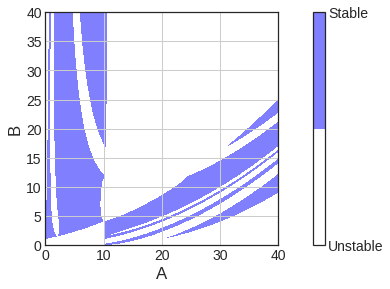

In [121]:
# Create a meshgrid [-4, 4]x[-2, 4] for (A, B) domain
L_A_min = 0
L_A_max = 40
L_B_min = 0
L_B_max = 40
A_size = 1000
B_size = 1000
A_axis = np.linspace(L_A_min, L_A_max, A_size)
B_axis = np.linspace(L_B_min, L_B_max, B_size)
A_grid, B_grid = np.meshgrid(A_axis, B_axis, sparse=False)

D_u_val = 0.001
D_v_val = 0.1

# k_2_c_1 > k_2_c_2
k_2_c_1_f = lambdify([A, B], k_2_c_1.subs([(D_u, D_u_val), (D_v, D_v_val)]), 'numpy')

#
def R_val_1(A, B):
    return D_u_val * k_2_c_1_f(A, B)


λs_strip_max_f = lambdify([A, B, R], λs_strip_max, 'numpy')

def λs_strip_max_f2_1(A, B):
    return λs_strip_max_f(A, B, R_val_1(A, B))


# Plotting
fig = plt.figure(figsize=(11,4))
plt.style.use('seaborn-white')

# Numerically calculate the largest eigenvalues
domain =np.real(λs_strip_max_f2_1(np.complex64(A_grid), np.complex64(B_grid)))
#domain = λs_strip_max_f2_1(A_grid, B_grid)
domain = np.where(domain <= 0, True, False)
#domain[domain > 0] = False
#domain[domain <= 0] = True
#domain[np.isnan(domain)] = False

domain2 = A_grid >=  R_val_1(A_grid, B_grid)
#  B > B_c = (R+1)^2
domain3 = B_grid >= (R_val_1(A_grid, B_grid) + 1)**2


domain_intersect = np.bool8(domain) & np.bool8(domain2) & np.bool8(domain3)#
# plot the domain by using zero as the levelset
ax = fig.add_subplot(111)
#plot_two_levels(ax, np.float16(np.bool8(domain)), [0, L, 0, L], "A", "R", 0, ['Unstable', 'Stable'])
#plot_two_levels(ax, np.float16(domain2), [0, L, 0, L], "A", "R", 0, ['Unstable', 'Stable'], color='red')
plot_two_levels(ax, np.float16(domain_intersect), 
                extent=[L_A_min, L_A_max, L_B_min, L_B_max], 
                aspect=(L_A_max-L_A_min)/(L_B_max-L_B_min),
                xlabel="A", 
                ylabel="B", 
                level=0, 
                level_names=['Unstable', 'Stable'], 
                color='blue')

plt.show()



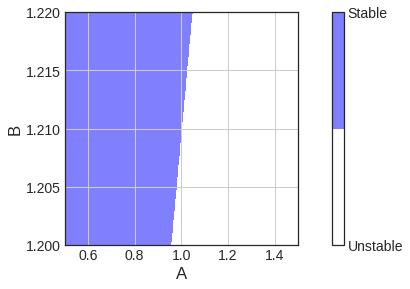

In [111]:
# Create a meshgrid [-4, 4]x[-2, 4] for (A, B) domain
L_A_min = .5
L_A_max = 1.5
L_B_min = 1.2
L_B_max = 1.22
A_size = 600
B_size = 600
A_axis = np.linspace(L_A_min, L_A_max, A_size)
B_axis = np.linspace(L_B_min, L_B_max, B_size)
A_grid, B_grid = np.meshgrid(A_axis, B_axis, sparse=False)

D_u_val = 0.001
D_v_val = 0.1

# k_2_c_1 > k_2_c_2
k_2_c_1_f = lambdify([A, B], k_2_c_1.subs([(D_u, D_u_val), (D_v, D_v_val)]), 'numpy')

#
def R_val_1(A, B):
    return D_u_val * k_2_c_1_f(A, B)


λs_strip_max_f = lambdify([A, B, R], λs_strip_max, 'numpy')

def λs_strip_max_f2_1(A, B):
    return λs_strip_max_f(A, B, R_val_1(A, B))


# Plotting
fig = plt.figure(figsize=(11,4))
plt.style.use('seaborn-white')

# Numerically calculate the largest eigenvalues
domain =np.real(λs_strip_max_f2_1(np.complex64(A_grid), np.complex64(B_grid)))
#domain = λs_strip_max_f2_1(A_grid, B_grid)
domain = np.where(domain <= 0, True, False)
#domain[domain > 0] = False
#domain[domain <= 0] = True
#domain[np.isnan(domain)] = False

domain2 = A_grid >=  R_val_1(A_grid, B_grid)
#  B > B_c = (R+1)^2
domain3 = B_grid >= (R_val_1(A_grid, B_grid) + 1)**2


domain_intersect = np.bool8(domain) & np.bool8(domain2) & np.bool8(domain3)#
# plot the domain by using zero as the levelset
ax = fig.add_subplot(111)
#plot_two_levels(ax, np.float16(np.bool8(domain)), [0, L, 0, L], "A", "R", 0, ['Unstable', 'Stable'])
#plot_two_levels(ax, np.float16(domain2), [0, L, 0, L], "A", "R", 0, ['Unstable', 'Stable'], color='red')
plot_two_levels(ax, np.float16(domain_intersect), 
                extent=[L_A_min, L_A_max, L_B_min, L_B_max], 
                aspect=(L_A_max-L_A_min)/(L_B_max-L_B_min),
                xlabel="A", 
                ylabel="B", 
                level=0, 
                level_names=['Unstable', 'Stable'], 
                color='blue')

plt.show()

